## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [12]:
import os
import keras
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [14]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [16]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 11s 220us/step - loss: 1.9369 - acc: 0.3023 - val_loss: 1.7848 - val_acc: 0.3587
Epoch 2/500
50000/50000 [==============================] - 10s 203us/step - loss: 1.7027 - acc: 0.3896 - val_loss: 1.6440 - val_acc: 0.4184
Epoch 3/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.6152 - acc: 0.4234 - val_loss: 1.5964 - val_acc: 0.4326
Epoch 4/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.5433 - acc: 0.4496 - val_loss: 1.6274 - val_acc: 0.4247
Epoch 5/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.5043 - acc: 0.4658 - val_loss: 1.5495 - val_acc: 0.4483
Epoch 6/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.4630 - acc: 0.4780 - val_loss: 1.4688 - val_acc: 0.4818
Epoch 7/500
50000/50000 [==============================] - 11s 221us/step - loss: 1.4345 - acc: 0.4893 - val_l

Epoch 59/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.5384 - acc: 0.8080 - val_loss: 2.0537 - val_acc: 0.5134
Epoch 60/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.5376 - acc: 0.8069 - val_loss: 2.0761 - val_acc: 0.5009
Epoch 61/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.5306 - acc: 0.8104 - val_loss: 2.0633 - val_acc: 0.5146
Epoch 62/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.5167 - acc: 0.8146 - val_loss: 2.0804 - val_acc: 0.5130
Epoch 63/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.5170 - acc: 0.8140 - val_loss: 2.0802 - val_acc: 0.5081
Epoch 64/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.5053 - acc: 0.8181 - val_loss: 2.1507 - val_acc: 0.5005
Epoch 65/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.5005 - acc: 0.8203 - val_loss: 2.1915 - val_acc: 0.5093
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.2763 - acc: 0.8998 - val_loss: 3.3948 - val_acc: 0.4982
Epoch 118/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.2344 - acc: 0.9158 - val_loss: 3.4939 - val_acc: 0.4856
Epoch 119/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.2607 - acc: 0.9067 - val_loss: 3.4789 - val_acc: 0.4865
Epoch 120/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.2404 - acc: 0.9134 - val_loss: 3.4146 - val_acc: 0.4938
Epoch 121/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.2323 - acc: 0.9155 - val_loss: 3.4705 - val_acc: 0.4962
Epoch 122/500
50000/50000 [==============================] - 12s 247us/step - loss: 0.2729 - acc: 0.9025 - val_loss: 3.4708 - val_acc: 0.4971
Epoch 123/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.2287 - acc: 0.9181 - val_loss: 3.5934 - val_acc: 0.4956
Epoch 

Epoch 175/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.2003 - acc: 0.9289 - val_loss: 4.2470 - val_acc: 0.4860
Epoch 176/500
50000/50000 [==============================] - 13s 259us/step - loss: 0.2033 - acc: 0.9283 - val_loss: 4.2334 - val_acc: 0.4881
Epoch 177/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.1634 - acc: 0.9417 - val_loss: 4.1524 - val_acc: 0.4852
Epoch 178/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.1317 - acc: 0.9531 - val_loss: 4.1568 - val_acc: 0.5002
Epoch 179/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.1231 - acc: 0.9559 - val_loss: 4.3103 - val_acc: 0.4886
Epoch 180/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.1826 - acc: 0.9338 - val_loss: 4.3689 - val_acc: 0.4812
Epoch 181/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.1959 - acc: 0.9313 - val_loss: 4.2251 - val_acc: 0.4965
Epoch 

Epoch 233/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.1178 - acc: 0.9590 - val_loss: 4.5826 - val_acc: 0.4929
Epoch 234/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0860 - acc: 0.9700 - val_loss: 4.6365 - val_acc: 0.4905
Epoch 235/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.1362 - acc: 0.9527 - val_loss: 4.6257 - val_acc: 0.4938
Epoch 236/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.1322 - acc: 0.9531 - val_loss: 4.6663 - val_acc: 0.4872
Epoch 237/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.1627 - acc: 0.9439 - val_loss: 4.6920 - val_acc: 0.4878
Epoch 238/500
50000/50000 [==============================] - 12s 250us/step - loss: 0.1617 - acc: 0.9451 - val_loss: 4.7060 - val_acc: 0.4770
Epoch 239/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.1335 - acc: 0.9537 - val_loss: 4.6758 - val_acc: 0.4915
Epoch 

Epoch 291/500
50000/50000 [==============================] - 13s 254us/step - loss: 0.0417 - acc: 0.9862 - val_loss: 4.7680 - val_acc: 0.4982
Epoch 292/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.0229 - acc: 0.9931 - val_loss: 4.8224 - val_acc: 0.4962
Epoch 293/500
50000/50000 [==============================] - 13s 259us/step - loss: 0.0193 - acc: 0.9949 - val_loss: 4.8319 - val_acc: 0.4972
Epoch 294/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0894 - acc: 0.9703 - val_loss: 5.0482 - val_acc: 0.4845
Epoch 295/500
50000/50000 [==============================] - 15s 291us/step - loss: 0.3080 - acc: 0.9097 - val_loss: 4.8610 - val_acc: 0.4786
Epoch 296/500
50000/50000 [==============================] - 13s 259us/step - loss: 0.1819 - acc: 0.9407 - val_loss: 4.9261 - val_acc: 0.4908
Epoch 297/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.1077 - acc: 0.9639 - val_loss: 4.7908 - val_acc: 0.4905
Epoch 

Epoch 349/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.3388 - acc: 0.9082 - val_loss: 5.0482 - val_acc: 0.4770
Epoch 350/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.1144 - acc: 0.9637 - val_loss: 4.9476 - val_acc: 0.4965
Epoch 351/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.0538 - acc: 0.9823 - val_loss: 5.0229 - val_acc: 0.4958
Epoch 352/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.0285 - acc: 0.9916 - val_loss: 5.0906 - val_acc: 0.4938
Epoch 353/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 4.9998 - val_acc: 0.4955
Epoch 354/500
50000/50000 [==============================] - 13s 258us/step - loss: 0.0822 - acc: 0.9715 - val_loss: 5.0785 - val_acc: 0.4939
Epoch 355/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.2166 - acc: 0.9358 - val_loss: 5.1330 - val_acc: 0.4795
Epoch 

Epoch 407/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.0922 - acc: 0.9703 - val_loss: 5.1198 - val_acc: 0.4950
Epoch 408/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.0546 - acc: 0.9820 - val_loss: 5.1519 - val_acc: 0.4954
Epoch 409/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.0502 - acc: 0.9832 - val_loss: 5.2250 - val_acc: 0.4929
Epoch 410/500
50000/50000 [==============================] - 13s 257us/step - loss: 0.0827 - acc: 0.9728 - val_loss: 5.2871 - val_acc: 0.4821
Epoch 411/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.0912 - acc: 0.9698 - val_loss: 5.2567 - val_acc: 0.4827
Epoch 412/500
50000/50000 [==============================] - 13s 259us/step - loss: 0.0770 - acc: 0.9746 - val_loss: 5.3192 - val_acc: 0.4912
Epoch 413/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.2478 - acc: 0.9308 - val_loss: 5.1910 - val_acc: 0.4849
Epoch 

Epoch 465/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0835 - acc: 0.9727 - val_loss: 5.2805 - val_acc: 0.4955
Epoch 466/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.0520 - acc: 0.9827 - val_loss: 5.2887 - val_acc: 0.4970
Epoch 467/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.1053 - acc: 0.9670 - val_loss: 5.3412 - val_acc: 0.4861
Epoch 468/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.0830 - acc: 0.9731 - val_loss: 5.3557 - val_acc: 0.4925
Epoch 469/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.0947 - acc: 0.9700 - val_loss: 5.3305 - val_acc: 0.4858
Epoch 470/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0833 - acc: 0.9725 - val_loss: 5.3662 - val_acc: 0.4956
Epoch 471/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0829 - acc: 0.9739 - val_loss: 5.5033 - val_acc: 0.4823
Epoch 

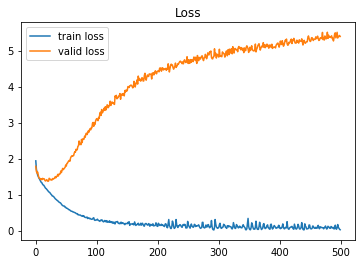

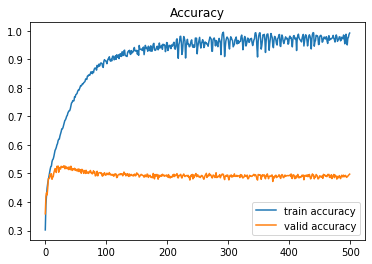

In [18]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [20]:
"""
Compile 模型
"""
model2 = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model2.summary()

optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.95, decay = 5e-5, nesterov = False)

model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [21]:
"""
設定要訓練的 Epoch 數
"""
model2.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.8791 - acc: 0.3227 - val_loss: 1.7605 - val_acc: 0.3612
Epoch 2/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.7005 - acc: 0.3900 - val_loss: 1.6362 - val_acc: 0.4129
Epoch 3/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.5926 - acc: 0.4313 - val_loss: 1.5882 - val_acc: 0.4293
Epoch 4/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.5260 - acc: 0.4547 - val_loss: 1.5122 - val_acc: 0.4591
Epoch 5/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.4820 - acc: 0.4707 - val_loss: 1.5193 - val_acc: 0.4570
Epoch 6/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.4412 - acc: 0.4858 - val_loss: 1.5259 - val_acc: 0.4568
Epoch 7/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.4317 - acc: 0.4884 - val_loss: 1.

50000/50000 [==============================] - 7s 134us/step - loss: 0.4146 - acc: 0.8528 - val_loss: 1.9863 - val_acc: 0.5346
Epoch 60/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.3970 - acc: 0.8570 - val_loss: 2.0398 - val_acc: 0.5321
Epoch 61/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.4018 - acc: 0.8573 - val_loss: 2.0641 - val_acc: 0.5304
Epoch 62/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.3900 - acc: 0.8612 - val_loss: 2.1341 - val_acc: 0.5244
Epoch 63/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.3722 - acc: 0.8682 - val_loss: 2.0954 - val_acc: 0.5315
Epoch 64/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.3637 - acc: 0.8707 - val_loss: 2.2115 - val_acc: 0.5203
Epoch 65/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.3525 - acc: 0.8744 - val_loss: 2.2214 - val_acc: 0.5136
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 7s 146us/step - loss: 0.0074 - acc: 0.9996 - val_loss: 3.6694 - val_acc: 0.5356
Epoch 118/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0065 - acc: 0.9997 - val_loss: 3.6721 - val_acc: 0.5358
Epoch 119/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0062 - acc: 0.9998 - val_loss: 3.6779 - val_acc: 0.5387
Epoch 120/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.0057 - acc: 0.9997 - val_loss: 3.6903 - val_acc: 0.5361
Epoch 121/500
50000/50000 [==============================] - 6s 130us/step - loss: 0.0054 - acc: 0.9999 - val_loss: 3.7117 - val_acc: 0.5369
Epoch 122/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.0051 - acc: 0.9999 - val_loss: 3.7218 - val_acc: 0.5403
Epoch 123/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 3.7387 - val_acc: 0.5384
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 7s 143us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 4.0185 - val_acc: 0.5357
Epoch 176/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 4.0209 - val_acc: 0.5366
Epoch 177/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 4.0224 - val_acc: 0.5361
Epoch 178/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 4.0274 - val_acc: 0.5363
Epoch 179/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 4.0320 - val_acc: 0.5369
Epoch 180/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 4.0286 - val_acc: 0.5350
Epoch 181/500
50000/50000 [==============================] - 7s 140us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 4.0361 - val_acc: 0.5369
Epoch 182/500
50000/50000 [

Epoch 233/500
50000/50000 [==============================] - 7s 132us/step - loss: 8.9601e-04 - acc: 1.0000 - val_loss: 4.1442 - val_acc: 0.5351
Epoch 234/500
50000/50000 [==============================] - 7s 136us/step - loss: 8.9249e-04 - acc: 1.0000 - val_loss: 4.1437 - val_acc: 0.5343
Epoch 235/500
50000/50000 [==============================] - 7s 138us/step - loss: 8.8501e-04 - acc: 1.0000 - val_loss: 4.1467 - val_acc: 0.5353
Epoch 236/500
50000/50000 [==============================] - 7s 133us/step - loss: 8.8246e-04 - acc: 1.0000 - val_loss: 4.1451 - val_acc: 0.5350
Epoch 237/500
50000/50000 [==============================] - 7s 138us/step - loss: 8.7654e-04 - acc: 1.0000 - val_loss: 4.1468 - val_acc: 0.5348
Epoch 238/500
50000/50000 [==============================] - 7s 140us/step - loss: 8.7072e-04 - acc: 1.0000 - val_loss: 4.1487 - val_acc: 0.5353
Epoch 239/500
50000/50000 [==============================] - 8s 159us/step - loss: 8.6628e-04 - acc: 1.0000 - val_loss: 4.1514 - v

50000/50000 [==============================] - 7s 135us/step - loss: 6.8412e-04 - acc: 1.0000 - val_loss: 4.2139 - val_acc: 0.5338
Epoch 290/500
50000/50000 [==============================] - 7s 134us/step - loss: 6.8398e-04 - acc: 1.0000 - val_loss: 4.2146 - val_acc: 0.5338
Epoch 291/500
50000/50000 [==============================] - 7s 137us/step - loss: 6.7954e-04 - acc: 1.0000 - val_loss: 4.2155 - val_acc: 0.5339
Epoch 292/500
50000/50000 [==============================] - 7s 131us/step - loss: 6.7665e-04 - acc: 1.0000 - val_loss: 4.2169 - val_acc: 0.5349
Epoch 293/500
50000/50000 [==============================] - 7s 132us/step - loss: 6.7438e-04 - acc: 1.0000 - val_loss: 4.2176 - val_acc: 0.5344
Epoch 294/500
50000/50000 [==============================] - 7s 143us/step - loss: 6.7171e-04 - acc: 1.0000 - val_loss: 4.2200 - val_acc: 0.5342
Epoch 295/500
50000/50000 [==============================] - 8s 154us/step - loss: 6.6914e-04 - acc: 1.0000 - val_loss: 4.2201 - val_acc: 0.5345

50000/50000 [==============================] - 7s 132us/step - loss: 5.6637e-04 - acc: 1.0000 - val_loss: 4.2645 - val_acc: 0.5345
Epoch 346/500
50000/50000 [==============================] - 7s 135us/step - loss: 5.6605e-04 - acc: 1.0000 - val_loss: 4.2645 - val_acc: 0.5352
Epoch 347/500
50000/50000 [==============================] - 7s 134us/step - loss: 5.6649e-04 - acc: 1.0000 - val_loss: 4.2647 - val_acc: 0.5352
Epoch 348/500
50000/50000 [==============================] - 7s 132us/step - loss: 5.6212e-04 - acc: 1.0000 - val_loss: 4.2656 - val_acc: 0.5348
Epoch 349/500
50000/50000 [==============================] - 7s 133us/step - loss: 5.6096e-04 - acc: 1.0000 - val_loss: 4.2652 - val_acc: 0.5351
Epoch 350/500
50000/50000 [==============================] - 7s 135us/step - loss: 5.5962e-04 - acc: 1.0000 - val_loss: 4.2666 - val_acc: 0.5351
Epoch 351/500
50000/50000 [==============================] - 7s 132us/step - loss: 5.5758e-04 - acc: 1.0000 - val_loss: 4.2680 - val_acc: 0.5346

50000/50000 [==============================] - 9s 174us/step - loss: 4.9138e-04 - acc: 1.0000 - val_loss: 4.3003 - val_acc: 0.5355
Epoch 402/500
50000/50000 [==============================] - 6s 129us/step - loss: 4.9034e-04 - acc: 1.0000 - val_loss: 4.3017 - val_acc: 0.5350
Epoch 403/500
50000/50000 [==============================] - 7s 145us/step - loss: 4.8912e-04 - acc: 1.0000 - val_loss: 4.3031 - val_acc: 0.5343
Epoch 404/500
50000/50000 [==============================] - 7s 138us/step - loss: 4.8866e-04 - acc: 1.0000 - val_loss: 4.3038 - val_acc: 0.5347
Epoch 405/500
50000/50000 [==============================] - 7s 140us/step - loss: 4.8740e-04 - acc: 1.0000 - val_loss: 4.3026 - val_acc: 0.5354
Epoch 406/500
50000/50000 [==============================] - 7s 143us/step - loss: 4.8651e-04 - acc: 1.0000 - val_loss: 4.3040 - val_acc: 0.5355
Epoch 407/500
50000/50000 [==============================] - 8s 152us/step - loss: 4.8561e-04 - acc: 1.0000 - val_loss: 4.3038 - val_acc: 0.5344

50000/50000 [==============================] - 7s 138us/step - loss: 4.3890e-04 - acc: 1.0000 - val_loss: 4.3314 - val_acc: 0.5348
Epoch 458/500
50000/50000 [==============================] - 7s 135us/step - loss: 4.3811e-04 - acc: 1.0000 - val_loss: 4.3319 - val_acc: 0.5346
Epoch 459/500
50000/50000 [==============================] - 7s 138us/step - loss: 4.3768e-04 - acc: 1.0000 - val_loss: 4.3315 - val_acc: 0.5350
Epoch 460/500
50000/50000 [==============================] - 7s 138us/step - loss: 4.3645e-04 - acc: 1.0000 - val_loss: 4.3325 - val_acc: 0.5347
Epoch 461/500
50000/50000 [==============================] - 7s 134us/step - loss: 4.3498e-04 - acc: 1.0000 - val_loss: 4.3325 - val_acc: 0.5343
Epoch 462/500
50000/50000 [==============================] - 7s 134us/step - loss: 4.3460e-04 - acc: 1.0000 - val_loss: 4.3331 - val_acc: 0.5345
Epoch 463/500
50000/50000 [==============================] - 7s 136us/step - loss: 4.3400e-04 - acc: 1.0000 - val_loss: 4.3344 - val_acc: 0.5344

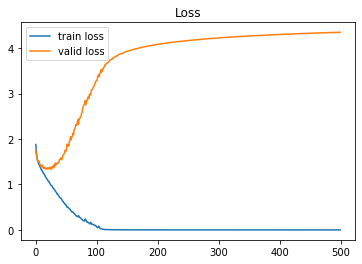

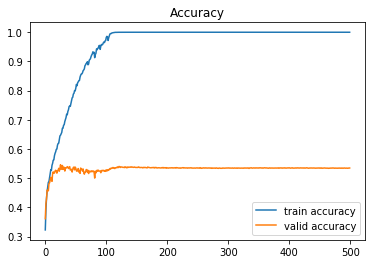

In [22]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()